In [1]:
# need to stall sympy
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats
from sympy import symbols, Eq, solve

In [2]:
######################################### 3.1 #########################################
num_player = 5
mu = 4
sigma=0.5
true_p = 20
increment = 0.05
v0=5
frozen_lognorm = stats.lognorm(s=0.5, scale=math.exp(4))

In [3]:
# player class
class Player:
    def __init__(self, initial_order, val):
        self.id = initial_order
        self.value = val

def ncr(n, r):
    f = math.factorial
    return f(n) // f(r) // f(n-r)

def phi(i, a):      #i,n=5,a
    x = symbols('x')
    temp_sum = 0
    for j in range(i,6):
        temp_sum = temp_sum + ncr(5, j) * pow(x,j) * pow(1-x,5-j)
    eq1 = Eq(temp_sum - a, 0)
    sol = solve(eq1)
    for i in sol:
        if i.is_real:
            if 0<i<1:
                return i
    for i in sol:
        if i.is_real:
            if i==1:
                return i
            if i==0:
                return i
    print("warning")
    return sol[0]

# delete
def true_F(x):
    if x < true_p:
        return (0)
    return(    ( frozen_lognorm.cdf(x) - frozen_lognorm.cdf(true_p) )/(1-frozen_lognorm.cdf(true_p)     )           )
true_F(140)

0.9694889220523512

In [4]:
def bid_or_not(player_i, current_price):
    if player_i.value >= current_price * (1+increment):
        return True
    return False

def get_final_bid(value):
    final_bid=[0 for i in range(num_player)] 
    active_player=[]
    active_player_net = []    # active player who are not the one just bidded
    current_id = None
    current_price = true_p

    for i in range(num_player):
        active_player.append(Player(i,value[i]))

    active_player_net = active_player

    while len(active_player) >= 2:
        current_player = np.random.choice(active_player_net, 1)[0]
        current_id = current_player.id

        if bid_or_not(current_player, current_price):
            current_price = current_price * (1+increment)
            final_bid[current_id] = current_price
        else:
            # update active player
            temp_active_player=[]
            for play in active_player:
                if play.id != current_id:
                    temp_active_player.append(play)
            active_player = temp_active_player

        # update selectable player
        temp_active_player_net=[]
        for play in active_player:
            if play.id != current_id:
                temp_active_player_net.append(play)
        active_player_net = temp_active_player_net

    return(final_bid)

def G(j,v):   #j,n=5,v
    j_index = j-1
    temp = 0
    for t in range(num_simulation):
        if all_final_bid[t][j_index] <= v:
            temp = temp + 1
    return(temp/num_simulation)

def G_increment(v):
    temp = 0
    for t in range(num_simulation):
        if all_final_bid[t][4]*(1+increment) <= v:
            temp = temp + 1
    return(temp/num_simulation)

def F_U(v):
    min_val = phi(1,G(1,v)) 
    for j in range(2, (num_player+1)):
        temp = phi(j,G(j,v))
        if temp < min_val:
            min_val = temp
    return(min_val)

def F_L(v):
    return( phi(4,G_increment(v)) )

In [5]:
num_simulation = 200
all_final_bid = [[0 for i in range(num_player)] for j in range(num_simulation)]
all_value = [[0 for i in range(num_player)] for j in range(num_simulation)]
for t in range(num_simulation):
    value = np.random.lognormal(mu, sigma, 5)
    all_value[t] = value
    print("here")
    print(value)
    final_bid = get_final_bid(value)
    final_bid.sort()
    print(final_bid)
    all_final_bid[t] = final_bid

here
[49.09851571 52.76055978 51.8031806  33.3401091  67.92874988]
[32.57789253554884, 39.59863198878797, 45.84036635602069, 50.539003907512814, 55.71925180803288]
here
[121.1530537   71.21244399  25.24134494  84.54122658  84.65628857]
[21.0, 50.539003907512814, 78.40258276917311, 82.32271190763177, 90.76078987816403]
here
[62.49337489 44.73218856 16.1411899  30.85376164 96.31117303]
[0, 26.801912812500007, 43.657491767638746, 61.430475118356256, 64.50199887427407]
here
[109.51659484  58.04878228  45.9478759   52.06770882  29.66450101]
[29.54910887578126, 35.9171265204426, 48.132384673821726, 53.065954102888455, 55.71925180803288]
here
[ 45.40874071 132.39594221  37.1951646  103.69666127  52.36438319]
[28.14200845312501, 37.71298284646473, 45.84036635602069, 100.06377084067584, 105.06695938270964]
here
[50.76547458 80.42148997 42.76523206 30.37051397 80.91589553]
[22.05, 29.54910887578126, 48.132384673821726, 74.66912644683153, 78.40258276917311]
here
[ 19.01448406 117.21226937 102.809

[29.54910887578126, 32.57789253554884, 45.84036635602069, 64.50199887427407, 67.72709881798777]
here
[ 38.9353235  130.31454115  51.92975754  24.58742264  33.57557163]
[0, 29.54910887578126, 31.026564319570326, 48.132384673821726, 50.539003907512814]
here
[111.86478921  61.69774543  22.10051831  61.30593959  28.10919732]
[22.05, 23.152500000000003, 50.539003907512814, 58.505214398434525, 64.50199887427407]
here
[90.86500697 29.3258762  46.12789419 59.50403522 89.20421477]
[0, 41.578563588227375, 50.539003907512814, 82.32271190763177, 86.43884750301336]
here
[78.63350269 81.99324263 86.09067337 35.40014268 31.61684503]
[31.026564319570326, 34.206787162326286, 67.72709881798777, 74.66912644683153, 82.32271190763177]
here
[ 36.96963704  52.66150094 132.15268609  16.98239226 139.03191051]
[0, 29.54910887578126, 43.657491767638746, 127.70954579817973, 134.09502308808874]
here
[61.36217204 39.52473773 41.79016906 70.59565726 69.53796355]
[26.801912812500007, 39.59863198878797, 53.06595410288

In [6]:
x_axis = np.arange(0, 180, 1)

In [17]:
bound_up = [0 for i in range(len(x_axis))]
bound_low = [0 for i in range(len(x_axis))]
for i in range(len(x_axis)):
    print(i)
    bound_up[i] = F_U(x_axis[i])
    bound_low[i] = F_L(x_axis[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


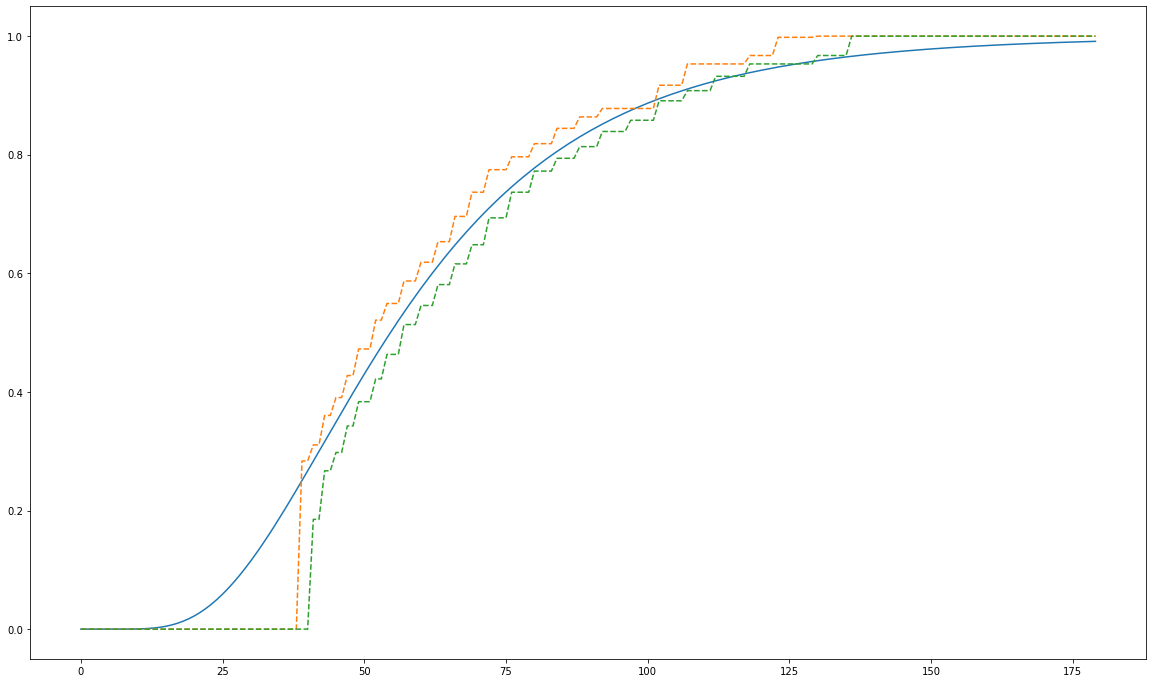

In [18]:
plt.figure(figsize=(20,12))
plt.plot(x_axis, frozen_lognorm.cdf(x_axis))
plt.plot(x_axis, bound_up,linestyle='dashed')
plt.plot(x_axis, bound_low,linestyle='dashed')
plt.savefig('cdf.png', dpi=300)

In [8]:



def get_profit_one(r,value):
    value.sort()
    temp = 0
    if value[3]<=r and value[4]>r:
        temp = temp+(r-v0)
    if value[3]>r:
        temp = temp+( value[3] -v0)
    return temp
def get_profit_all(r):
    temp = 0
    for value in all_value:
        temp = temp + get_profit_one(r,value)
    return(temp/num_simulation)


def F45(r):
    count=0
    for value in all_value:
        if value[3]<r:
            count=count+1
    return(count/num_simulation)


def F55(r):
    count=0
    for value in all_value:
        if value[4]<r:
            count=count+1
    return(count/num_simulation)

def get_profit_bound(r):
    part = np.arange(0, 180, 0.05)
    ub=0
    lb=0
    middle=0
    temp_1 = 0
    temp_2 = 0
    for i in range(len(part)-1):
        count=0
        for value in all_value:
            if part[i] <= value[3] < part[i+1]:
                count = count+1
        temp_1 = temp_1+count/num_simulation * max(r,part[i])
    ub=temp_1-v0-(r-v0)*   pow( phi(4,F45(r)),5 )
    lb=temp_1-v0-(r-v0)* F45(r)
    middle= temp_1-v0-(r-v0)* F55(r)
    return([ub,lb,middle])

In [9]:
profit_list = [0 for i in range(len(x_axis))]
profit_list_2 = [0 for i in range(len(x_axis))]
profit_ub_list = [0 for i in range(len(x_axis))]
profit_lb_list = [0 for i in range(len(x_axis))]
for i in range(len(x_axis)):
    print(i)
    temp = get_profit_bound(x_axis[i])
    profit_list[i] = get_profit_all(x_axis[i])
    profit_list_2[i] = temp[2]
    profit_ub_list[i] = temp[0]
    profit_lb_list[i] = temp[1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


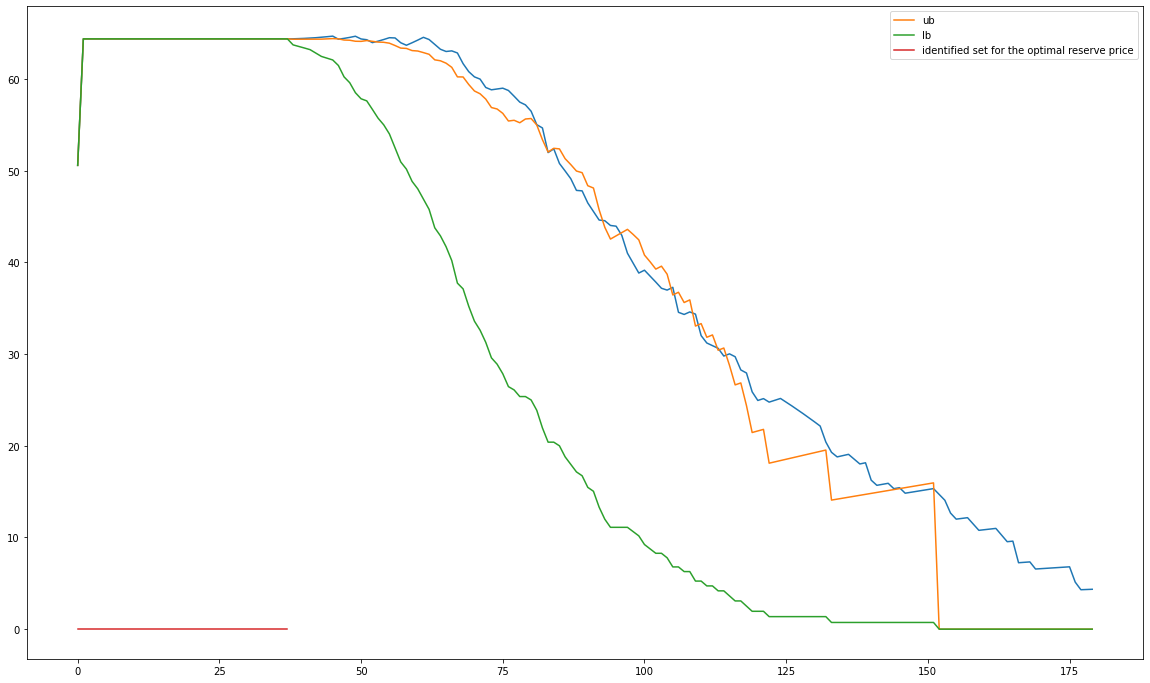

In [23]:
plt.figure(figsize=(20,12))
plt.plot(x_axis, profit_list_2)
plt.plot(x_axis, profit_ub_list,label="ub")
plt.plot(x_axis, profit_lb_list,label="lb")
plt.legend()
plt.savefig('profit.png', dpi=300)

In [45]:
######################################### 3.2 #########################################

r = 0.1
mean = [mu]*5
cov = [[0 for i in range(5)] for j in range(5)]
for i in range(5):
    for j in range(5):
        if i==j:
            cov[i][j] = pow(sigma,2)
        else:
            cov[i][j] = pow(sigma,2)*r

In [46]:
num_simulation = 200
all_final_bid = [[0 for i in range(num_player)] for j in range(num_simulation)]
all_value = [[0 for i in range(num_player)] for j in range(num_simulation)]
for t in range(num_simulation):
    e = np.random.multivariate_normal(mean, cov).T
    value = [0 for i in range(5)]
    for i in range(5):
        value[i] = math.exp(e[i])
    all_value[t] = value
    print("here")
    print(value)
    final_bid = get_final_bid(value)
    final_bid.sort()
    print(final_bid)
    all_final_bid[t] = final_bid

here
[81.2264339286594, 120.97620535843946, 166.53875715336494, 46.77960336116442, 95.45267133446235]
[32.57789253554884, 71.11345375888716, 78.40258276917311, 115.83632271943739, 121.62813885540926]
here
[44.71376379780241, 94.92959507514638, 105.3083212837148, 48.06173028256569, 79.23129505496419]
[28.14200845312501, 45.84036635602069, 67.72709881798777, 86.43884750301336, 90.76078987816403]
here
[80.98305243374256, 30.814787756055185, 107.63983861315941, 76.74491384503912, 123.81885647669235]
[24.310125000000003, 67.72709881798777, 78.40258276917311, 100.06377084067584, 105.06695938270964]
here
[43.29904224875351, 64.371551242865, 188.104147681683, 50.882415962608405, 64.33973298501701]
[23.152500000000003, 45.84036635602069, 50.539003907512814, 61.430475118356256, 67.72709881798777]
here
[164.77669570501416, 46.974297429203, 62.466518322335425, 87.01711686992422, 142.35269708882228]
[39.59863198878797, 61.430475118356256, 82.32271190763177, 134.09502308808874, 140.79977424249319]
h

[0, 29.54910887578126, 35.9171265204426, 41.578563588227375, 43.657491767638746]
here
[52.841574287378116, 53.9955119644332, 103.14795552223018, 95.8373246031422, 192.10173944983623]
[48.132384673821726, 53.065954102888455, 90.76078987816403, 95.29882937207223, 100.06377084067584]
here
[27.167700198722873, 26.690144090115627, 67.6499641106588, 54.74109226042364, 55.557209776252236]
[21.0, 25.525631250000004, 39.59863198878797, 50.539003907512814, 53.065954102888455]
here
[70.85049008589812, 32.962709135848996, 93.99250387748808, 30.589750344467536, 56.48059867704328]
[0, 32.57789253554884, 55.71925180803288, 67.72709881798777, 71.11345375888716]
here
[20.558419424162196, 93.9342538323547, 64.56009969368614, 59.51368152470901, 28.23323833161797]
[0, 21.0, 48.132384673821726, 58.505214398434525, 64.50199887427407]
here
[90.81055653910998, 86.69483245464723, 147.97091302512362, 91.34715573741634, 67.11329157874596]
[50.539003907512814, 74.66912644683153, 86.43884750301336, 90.760789878164

In [47]:
x_axis = np.arange(0, 180, 1)
bound_up = [0 for i in range(len(x_axis))]
bound_low = [0 for i in range(len(x_axis))]
for i in range(len(x_axis)):
    print(i)
    bound_up[i] = F_U(x_axis[i])
    bound_low[i] = F_L(x_axis[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


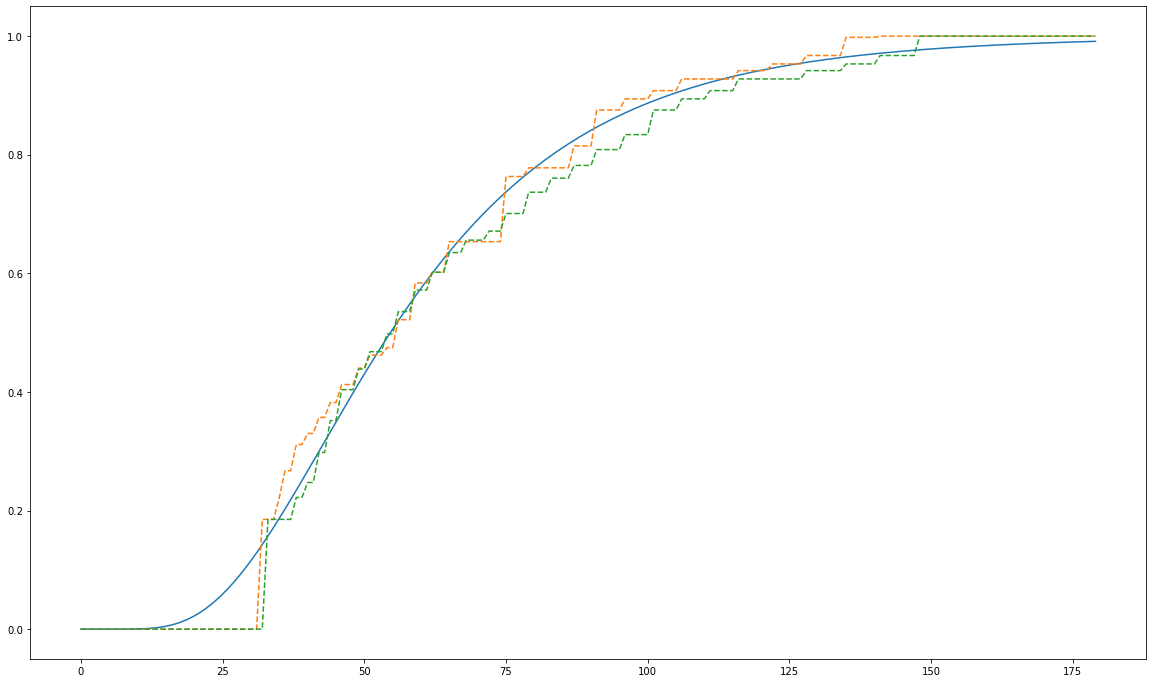

In [48]:
plt.figure(figsize=(20,12))
plt.plot(x_axis, frozen_lognorm.cdf(x_axis))
plt.plot(x_axis, bound_up,linestyle='dashed')
plt.plot(x_axis, bound_low,linestyle='dashed')
plt.savefig('cdf_0.1.png', dpi=300)

In [41]:
profit_list = [0 for i in range(len(x_axis))]
profit_list_2 = [0 for i in range(len(x_axis))]
profit_ub_list = [0 for i in range(len(x_axis))]
profit_lb_list = [0 for i in range(len(x_axis))]
for i in range(len(x_axis)):
    print(i)
    temp = get_profit_bound(x_axis[i])
    profit_list[i] = get_profit_all(x_axis[i])
    profit_list_2[i] = temp[2]
    profit_ub_list[i] = temp[0]
    profit_lb_list[i] = temp[1]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179


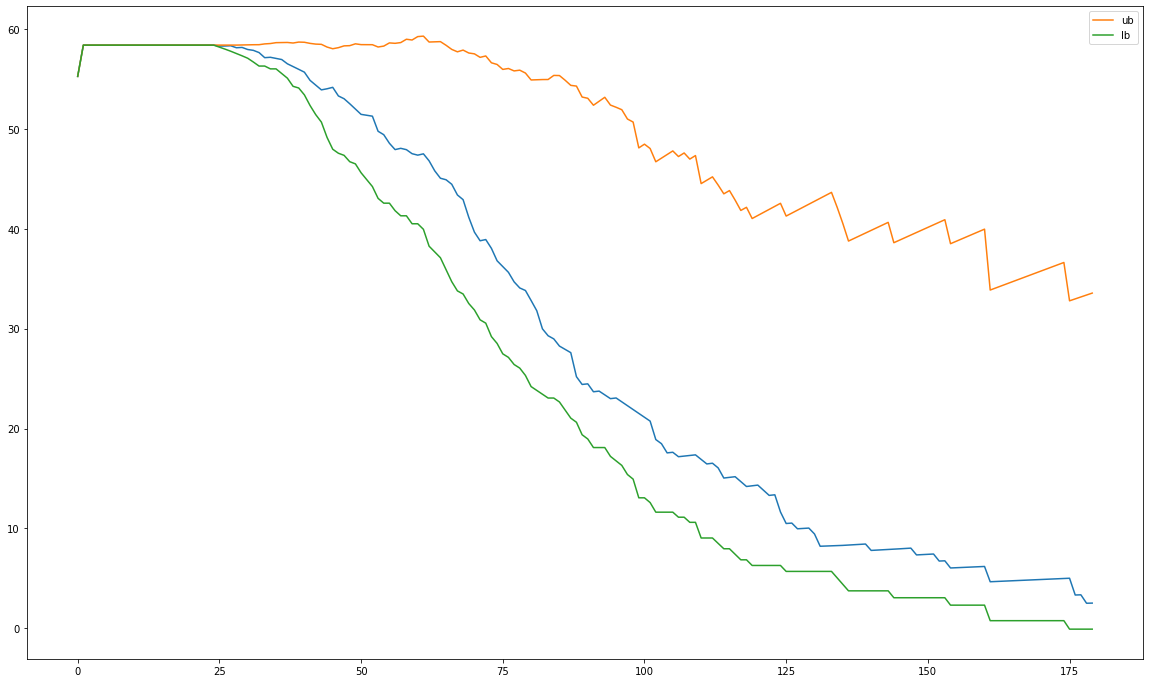

In [42]:
plt.figure(figsize=(20,12))
plt.plot(x_axis, profit_list_2)
plt.plot(x_axis, profit_ub_list,label="ub")
plt.plot(x_axis, profit_lb_list,label="lb")
plt.legend()
plt.savefig('profit_0.8.png', dpi=300)